(18, 64)


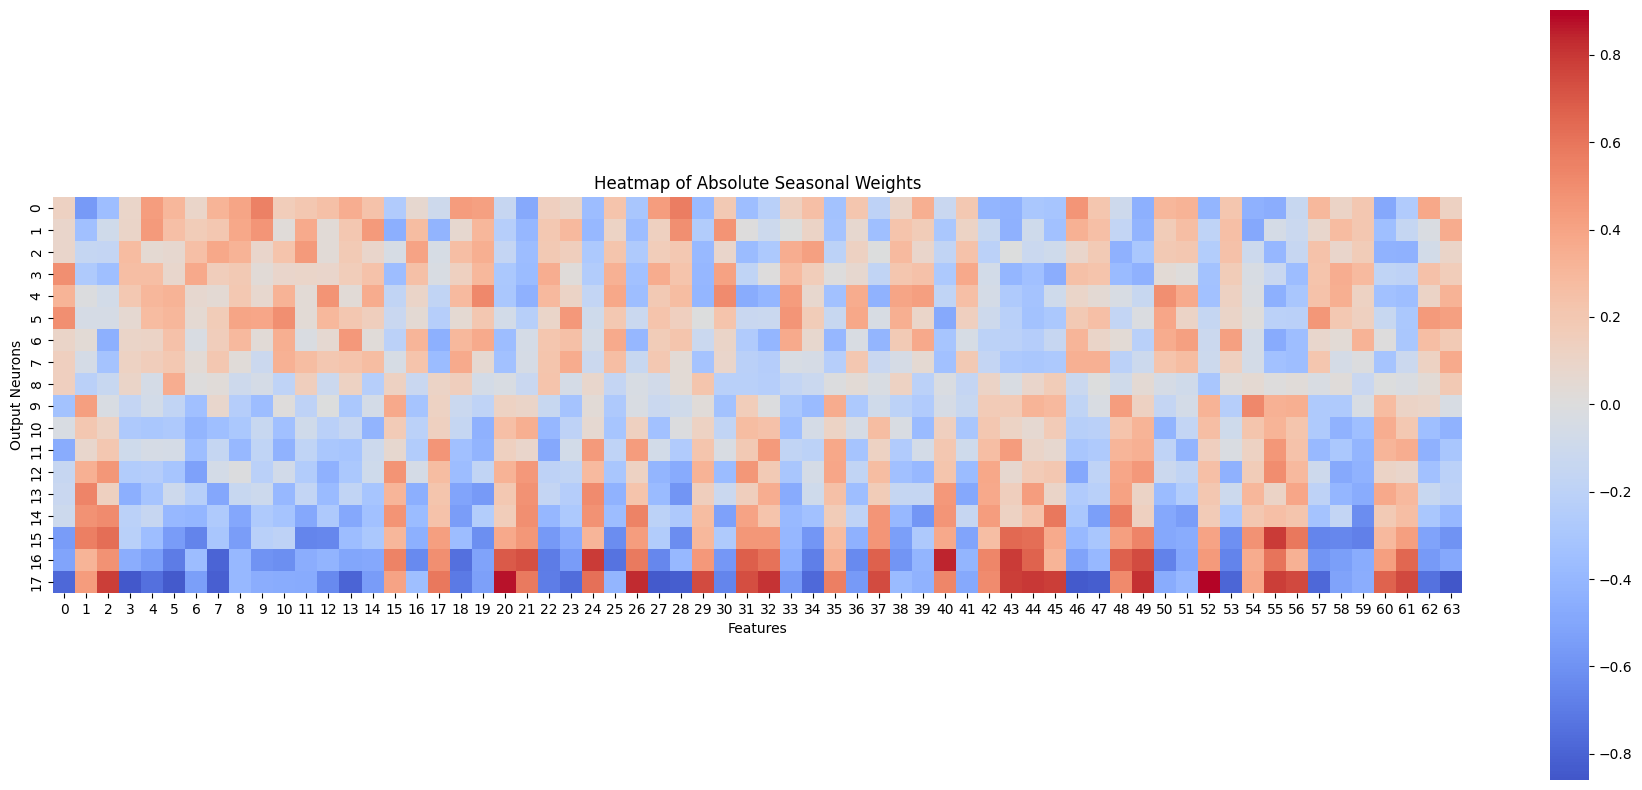

In [7]:
%matplotlib inline
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

param = 'patch_weights.npy'
#param2 = 'treand_weights.npy'
path = "./LightTime_LearnablePosition/"

linear_weights = np.load(os.path.join(path,param))
linear_weights = linear_weights.T
print(linear_weights.shape)
#trend_weights = np.load(os.path.join(path,param2))

# 计算权重的绝对值
abs_linear_weights = linear_weights#np.abs(linear_weights)
#abs_trend_weights = trend_weights#np.abs(trend_weights)

# 创建一个图形对象和轴对象
plt.figure(figsize=(50, 10))

# 左边的热力图
plt.subplot(1, 2, 1)
sns.heatmap(abs_linear_weights, annot=False, cmap='coolwarm', square=True, center=0)
plt.title('Heatmap of Absolute Seasonal Weights')
plt.xlabel('Features')
plt.ylabel('Output Neurons')

# # 右边的热力图
# plt.subplot(1, 2, 2)
# sns.heatmap(abs_trend_weights, annot=False, cmap='viridis', square=True)
# plt.title('Heatmap of Absolute Trend Weights')
# plt.xlabel('Features')
# plt.ylabel('Output Neurons')

# # 调整子图之间的间隔
# plt.subplots_adjust(wspace=0.2)

# 显示热力图
plt.savefig('./pics/SegRNN_36.png')
plt.show()

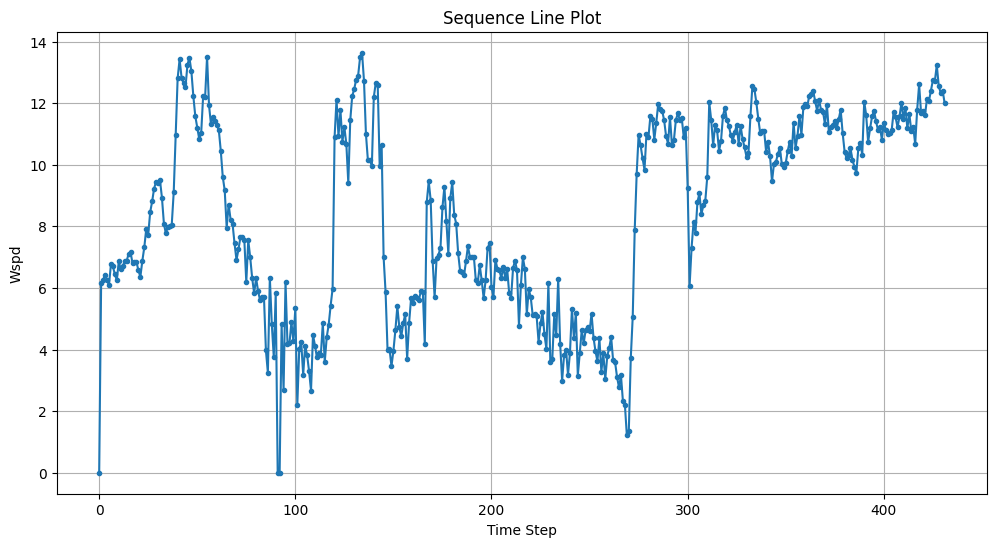

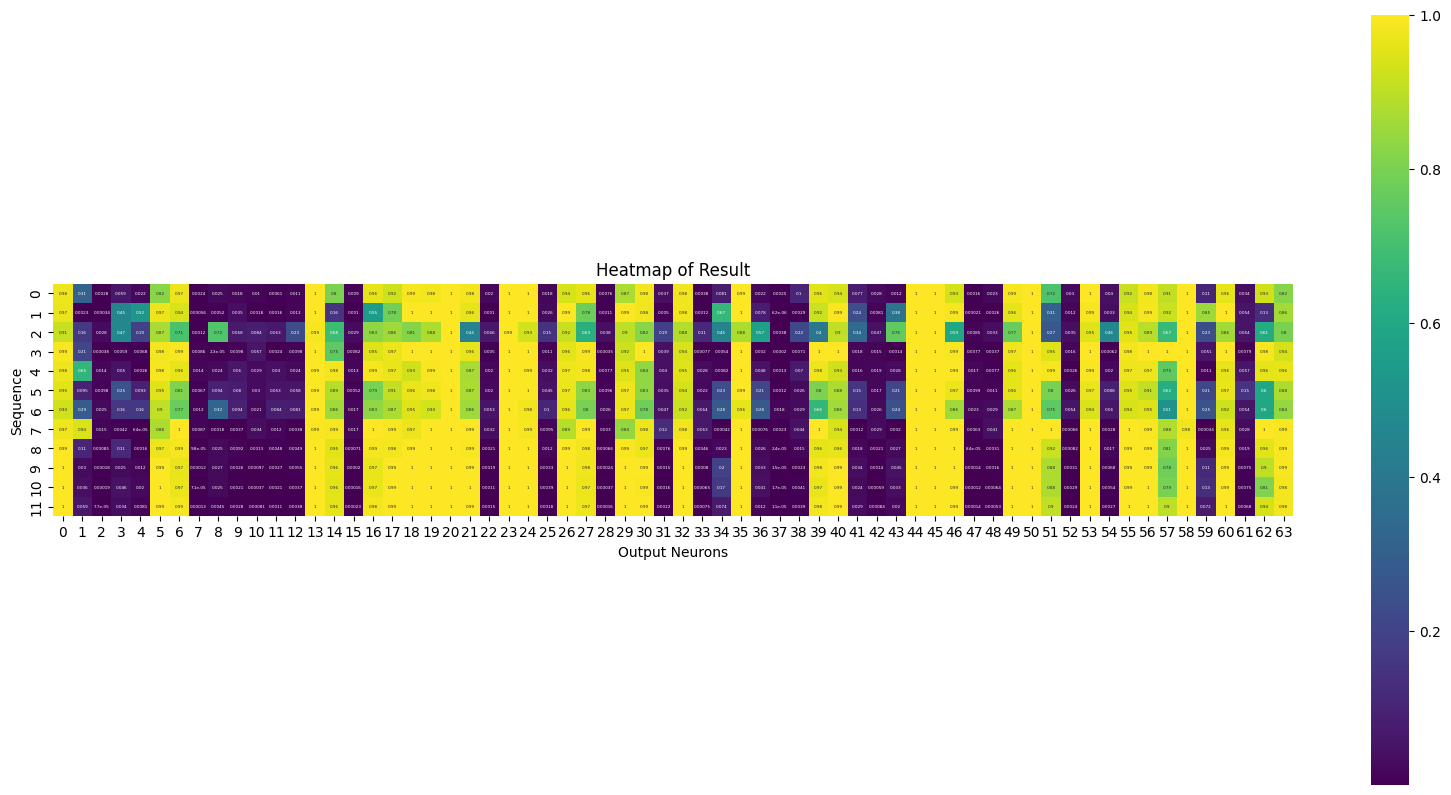

In [38]:
import pandas as pd

# 从文件中读取数据
file_path = os.path.join('../../dataset/processed/', 'Turb1.csv')
data = pd.read_csv(file_path)

# 假设文件中有一列名为 'sequence'
sequence = data['Wspd'].values[0:432].reshape(-1, 36)


#print(sequence)
# 将序列与权重相乘
result = np.dot(sequence, linear_weights)
# 模拟 sigmoid 函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 对 result 应用 sigmoid 函数
result = sigmoid(result)

#print(result)
# 绘制 sequence 的折线图
plt.figure(figsize=(12, 6))
plt.plot(sequence.flatten(), marker='.')
plt.title('Sequence Line Plot')
plt.xlabel('Time Step')
plt.ylabel('Wspd')
plt.grid(True)
plt.savefig('./pics/SegRNN_36_sequence.png')

# 绘制 result 的热力图
plt.figure(figsize=(20, 10))

sns.heatmap(result, annot=True, cmap='viridis', square=True, annot_kws={"size": 3})
plt.title('Heatmap of Result')
plt.xlabel('Output Neurons')
plt.ylabel('Sequence')
plt.savefig('./pics/SegRNN_36_result.png')